<a href="https://colab.research.google.com/github/anwar-ai/Classification-des-defauts-Tolerie/blob/master/VGG_Tolerie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Texte alternatif…](https://raw.githubusercontent.com/anwar-ai/Classification-des-defauts-Tolerie/master/dw.PNG)



 #**Automatisation des procédés CND par IA**


Inspection of metallic structures has been a critical process in the automotive manufacturing industry to reduce manufacturing cost, improve yield, and ensure product quality and reliability. This paper  proposes the inspection of three   different kinds of defects **"pitted surface"** ,**"scratches"** and **"crazing"** using VGG16 model for image classificaton , the dataset contains 900 images in 200x200 format with 3 RGB channels.
80% of the data is dedicated to the training, 20% is left for the model testing,the "TEST" folder is used for the final evaluation of the model.
```
#Anwar Aachati anwar.aachati@altran.com
```


In [4]:
import numpy as np
import pandas as pd
import os
import time
import csv
import shutil

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model

Using TensorFlow backend.


In [30]:
!git clone https://github.com/anwar-ai/Classification-des-defauts-Tolerie.git

Cloning into 'Classification-des-defauts-Tolerie'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 954 (delta 2), reused 0 (delta 0), pack-reused 945
Receiving objects: 100% (954/954), 14.16 MiB | 15.64 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [6]:
ls Classification-des-defauts-Tolerie/.

 craquelage/   README.md                                    TEST/
 Piqures/     'Reconaissance automatique des défauts.pdf'   usure/


In [7]:
import os
import numpy as np
import cv2

path="Classification-des-defauts-Tolerie/"
img_list=[]
defect_type=["usure","craquelage","Piqures"]
for type_ in defect_type:
  img_names_list=os.listdir(path+type_)
  for j in img_names_list :
    image=cv2.imread(path+type_+"/"+j)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
    image=cv2.resize(image,(224,224))
    img_list.append(image)
image_=np.array(img_list)
  
print(image_.shape)


(900, 224, 224, 3)


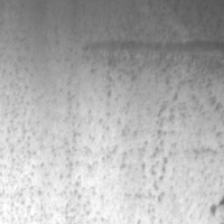

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)


In [0]:
x=image_
num_of_samples = image_.shape[0]

labels = np.ones((num_of_samples,),dtype='int64')
num_classes = 3
labels[0:300]=0
labels[300:600]=1
labels[600:900]=2


Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(image_,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)


In [10]:
# from keras.applications.resnet50 import ResNet50
# from keras.layers import Dropout
# from keras.applications.resnet50 import preprocess_input, decode_predictions

#input shape
image_input = Input(shape=(224, 224, 3))

#VGG16 
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

# # model = ResNet50(weights='imagenet')
# model=ResNet50(include_top=False, weights='imagenet', input_tensor=image_input)

model.summary()

last_layer = model.get_layer('fc2').output
# last_layer = model.output
# last_layer = Flatten()(last_layer)
# last_layer = Dropout(0.5)(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t=time.time()

hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=21, verbose=1, validation_data=(X_test, y_test))


print('Training time: %s' % time.time())

(Erreur, Précision) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] Erreur={:.4f}, Précision: {:.4f}%".format(Erreur,Précision * 100))

prediction = custom_vgg_model.predict(X_test)
predict = np.argmax(prediction,axis=1)
ans =np.argmax(y_test,axis=1)


553467904/553467096 [==============================] - 21s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

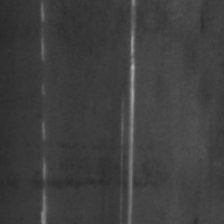

In [11]:
cv2_imshow(X_test[0,:,:,])

In [57]:
ipp_prediction(X_test[2,:,:,])
  

'piqures'

In [13]:
p=X_test[0:4,:,:,]
t=custom_vgg_model.predict(p)
print(np.argmax(t,axis=1))

[0 1 2 0]


In [0]:
def ipp_prediction(photo):
  import cv2
  img=photo.reshape(1,224,224,3)
  p=custom_vgg_model.predict(img)
  if np.argmax(p,axis=1)[0]==0:
    text="Usure"
  elif np.argmax(p,axis=1)[0]==1:
      text="fissures"
  else :
      text="piqures"
  return(text)


  

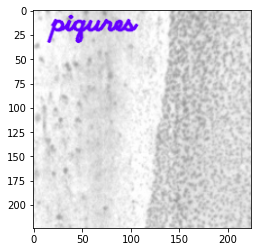

In [64]:
path="Classification-des-defauts-Tolerie/TEST"
vecteur=[ ]
for im in os.listdir(path):
  k = cv2.imread(path+"/"+im) 
  k=cv2.resize(k,(224,224))
  vecteur.append(k)
vecteur=np.array(vecteur)
vecteur.shape
for pic in vecteur:
  font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
  cv2.putText(pic,ipp_prediction(pic),(20,20), font, 1,(100,0,255),2,cv2.LINE_AA) 
  plt.imshow(pic)


 


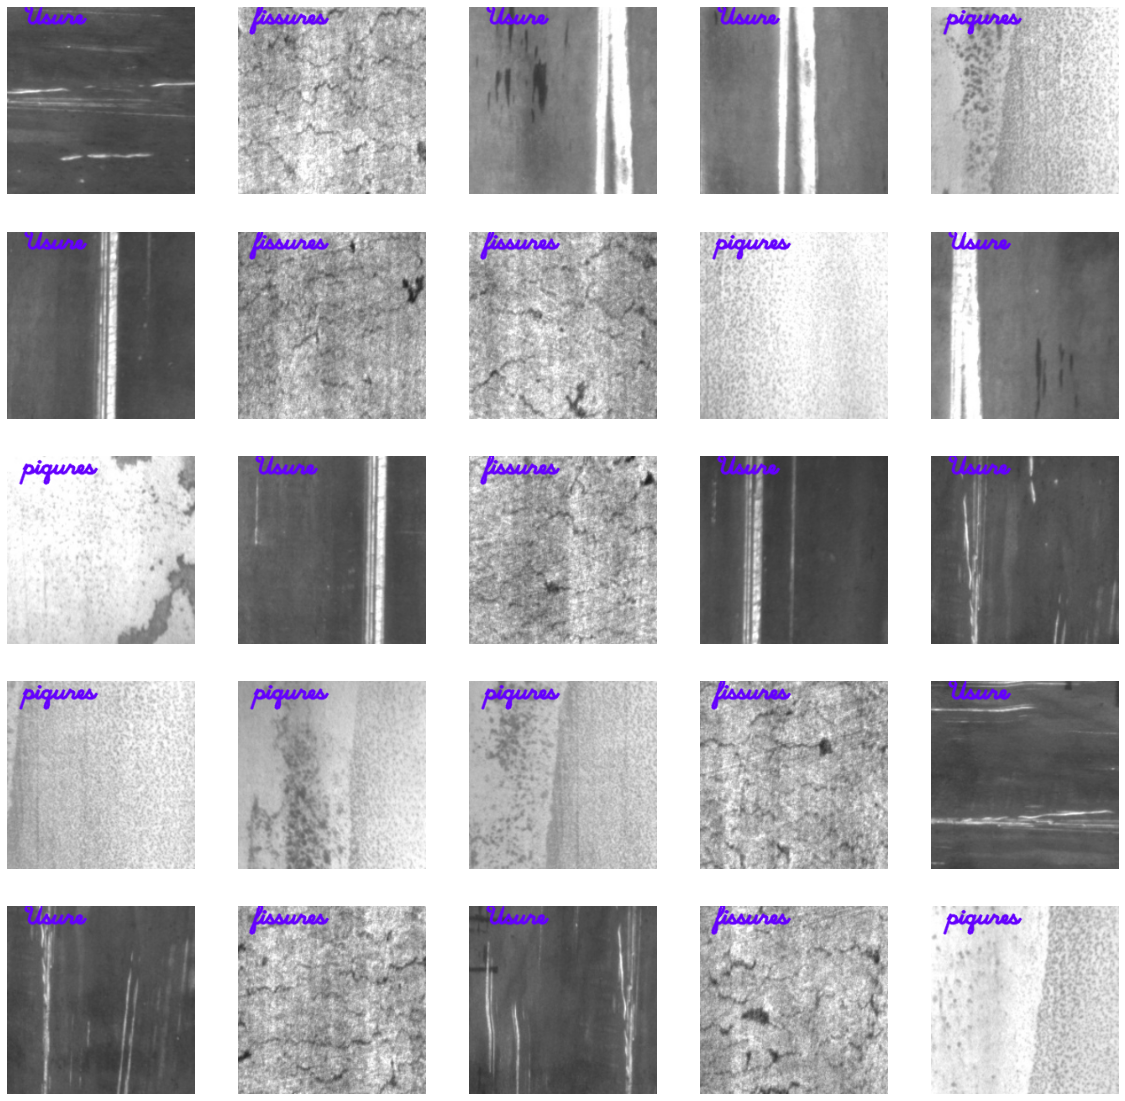

In [75]:
plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)   
    plt.imshow(vecteur[i])
    plt.axis("off")

plt.show()

![Texte alternatif…](https://scontent.fcmn2-2.fna.fbcdn.net/v/t1.0-9/16708524_384221281951686_6507590978346456521_n.jpg?_nc_cat=108&_nc_sid=2d5d41&_nc_ohc=ZFpiVhqJ1-UAX9HM2B2&_nc_ht=scontent.fcmn2-2.fna&oh=531c7d0ff4c39fa5b5675d416938685b&oe=5EDEB142)